In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(color_codes=True)

In [3]:
df = pd.read_csv("C:\\Users\\KIIT\\3D Objects\\Project\\Airlines Delay Prediction\\DataSet\\airlines_delay.csv")
df.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0
1,6948.0,360.0,146.0,OO,COS,ORD,4,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0
3,31.0,1410.0,344.0,US,OGG,PHX,6,0
4,563.0,692.0,98.0,FL,BMI,ATL,4,0


<Axes: xlabel='Airline', ylabel='count'>

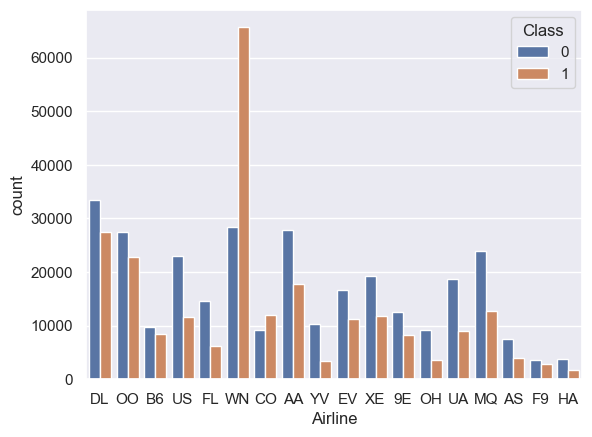

In [4]:
sns.countplot(data=df, x="Airline", hue="Class")
#WN Airlines are the only airline that often delayed than other airlines

<Axes: xlabel='Airline', ylabel='Length'>

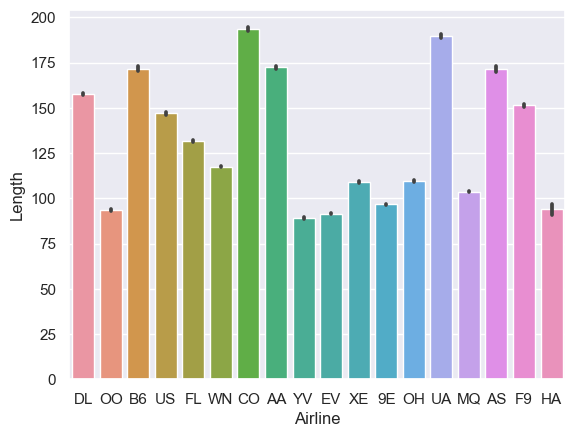

In [5]:
sns.barplot(data=df, x="Airline", y="Length")
#CO and UA have the longest average flight time

<Axes: xlabel='Airline', ylabel='Time'>

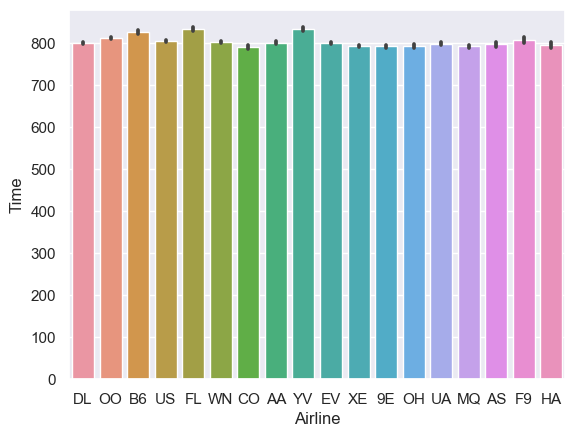

In [6]:
sns.barplot(data=df, x="Airline", y="Time")
#Almost all of the airplane have the same departure time

In [7]:
#Remove flight ID
df = df.drop('Flight', axis=1)
df.head()

,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,1296.0,141.0,DL,ATL,HOU,1,0
1,360.0,146.0,OO,COS,ORD,4,0
2,1170.0,143.0,B6,BOS,CLT,3,0
3,1410.0,344.0,US,OGG,PHX,6,0
4,692.0,98.0,FL,BMI,ATL,4,0


In [8]:
df['Airline'].unique()

array(['DL', 'OO', 'B6', 'US', 'FL', 'WN', 'CO', 'AA', 'YV', 'EV', 'XE',
       '9E', 'OH', 'UA', 'MQ', 'AS', 'F9', 'HA'], dtype=object)

In [9]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Airline']= label_encoder.fit_transform(df['Airline'])
df['Airline'].unique()

array([ 5, 12,  3, 14,  8, 15,  4,  1, 17,  6, 16,  0, 11, 13, 10,  2,  7,
        9])

In [10]:
df['AirportFrom'].unique()

array(['ATL', 'COS', 'BOS', 'OGG', 'BMI', 'MSY', 'EWR', 'DFW', 'BWI',
       'CRW', 'LGB', 'BIS', 'CLT', 'IAH', 'LAX', 'JAX', 'SAV', 'CLE',
       'FLL', 'SAN', 'BHM', 'ROC', 'DTW', 'STT', 'AUS', 'DCA', 'PHX',
       'EYW', 'IND', 'JFK', 'ORD', 'PBI', 'SFO', 'MIA', 'DSM', 'SLC',
       'PHL', 'BZN', 'GRB', 'MBS', 'SBA', 'TYS', 'MSP', 'DEN', 'SAT',
       'BUF', 'RIC', 'SEA', 'PDX', 'LAS', 'IAD', 'HNL', 'BDL', 'MOT',
       'PSE', 'CPR', 'SNA', 'STL', 'CVG', 'PIT', 'HSV', 'SGF', 'RDU',
       'MEM', 'KOA', 'ELP', 'SJU', 'JAN', 'AEX', 'LGA', 'RSW', 'MDT',
       'GUC', 'MKE', 'CAE', 'GRR', 'FAR', 'LIT', 'OMA', 'BNA', 'EVV',
       'RDD', 'OKC', 'ITO', 'SJC', 'MCO', 'LBB', 'CSG', 'OAK', 'PHF',
       'ABQ', 'SMF', 'FAY', 'ABI', 'MSO', 'MFE', 'GEG', 'MSN', 'TPA',
       'DAY', 'RNO', 'PVD', 'ALB', 'CHO', 'ONT', 'LIH', 'PSP', 'LAN',
       'LEX', 'XNA', 'GJT', 'CMH', 'GSO', 'PSC', 'SYR', 'AVL', 'MHT',
       'GRK', 'MCI', 'TXK', 'LRD', 'ABE', 'LWB', 'ERI', 'DAL', 'ANC',
       'TUS', 'ROA',

In [11]:
df['AirportFrom']= label_encoder.fit_transform(df['AirportFrom'])
df['AirportFrom'].unique()

array([ 16,  65,  35, 203,  32, 198,  96,  80,  45,  69, 160,  29,  60,
       135, 154, 147, 245,  58, 104, 243,  27, 238,  85, 269,  18,  78,
       217,  97, 139, 148, 208, 213, 253, 183,  84, 261, 216,  46, 117,
       171, 246, 285, 197,  79, 244,  43, 234, 252, 214, 153, 134, 128,
        22, 192, 225,  67, 264, 268,  71, 221, 132, 254, 233, 177, 150,
        91, 260, 146,  10, 159, 241, 174, 124, 184,  47, 119,  99, 162,
       205,  33,  94, 231, 204, 143, 258, 173, 155,  70, 202, 215,   2,
       262, 101,   1, 196, 178, 111, 195, 277,  76, 236, 228,  12,  53,
       207, 161, 227, 152, 157, 290, 114,  61, 120, 224, 273,  19, 182,
       118, 172, 283, 165,   0, 167,  92,  75,  14, 280, 237, 191, 149,
       248,  50, 279, 107, 106,  42, 102, 115, 230, 175, 109,  44, 223,
       240, 129,  34,  68,  38,  17, 256, 263, 232, 209, 116, 151, 136,
       242,  48, 137, 193, 288,  54, 170, 130,  20,  21, 278, 121, 126,
       188,  93,  13, 181, 141,  56, 190,  26, 267, 187,  89, 15

In [13]:
df['AirportTo'].unique()

array(['HOU', 'ORD', 'CLT', 'PHX', 'ATL', 'BHM', 'DFW', 'MEM', 'GRR',
       'PBI', 'MCO', 'SFO', 'DEN', 'YUM', 'BWI', 'HPN', 'EWR', 'JFK',
       'MKE', 'OAK', 'IAH', 'CLE', 'SYR', 'SJU', 'BDL', 'SAN', 'DTW',
       'PSP', 'DCA', 'LGA', 'STL', 'FAY', 'MSP', 'BUF', 'LAS', 'SGU',
       'SLC', 'GJT', 'LAX', 'VPS', 'FAR', 'RKS', 'BOS', 'ANC', 'SNA',
       'ONT', 'RNO', 'JAX', 'GSP', 'CVG', 'TPA', 'SEA', 'LEX', 'SMF',
       'CAE', 'STT', 'DAY', 'MDW', 'RSW', 'ITO', 'IAD', 'ICT', 'HNL',
       'MIA', 'CRW', 'RDU', 'MHT', 'FAT', 'CAK', 'COS', 'DAL', 'TYS',
       'PHL', 'ABI', 'MOB', 'SDF', 'SAV', 'MDT', 'LIT', 'TUL', 'ACV',
       'BNA', 'MCI', 'MSY', 'FLL', 'PVD', 'OKC', 'ECP', 'PHF', 'AUS',
       'RIC', 'LIH', 'ABQ', 'JAN', 'PIT', 'BMI', 'BTV', 'RAP', 'MRY',
       'CSG', 'SHV', 'FAI', 'SJC', 'PIA', 'SBN', 'IND', 'SGF', 'ACT',
       'SRQ', 'ROC', 'CHO', 'JAC', 'SAT', 'FWA', 'OMA', 'PDX', 'CMH',
       'PWM', 'CID', 'TRI', 'ORF', 'GTF', 'TUS', 'MHK', 'BUR', 'MLU',
       'CEC', 'TEX',

In [14]:
df['AirportTo']= label_encoder.fit_transform(df['AirportTo'])
df['AirportTo'].unique()

array([129, 208,  60, 217,  16,  27,  80, 177, 119, 213, 173, 253,  79,
       292,  45, 130,  96, 148, 184, 202, 135,  58, 273, 260,  22, 243,
        85, 227,  78, 159, 268, 101, 197,  43, 153, 255, 261, 114, 154,
       288,  99, 235,  35,  14, 264, 207, 236, 147, 121,  71, 277, 252,
       157, 262,  47, 269,  76, 175, 241, 143, 134, 136, 128, 183,  69,
       233, 182, 100,  48,  65,  75, 285, 216,   1, 190, 251, 245, 174,
       162, 279,   6,  33, 172, 198, 104, 228, 204,  87, 215,  18, 234,
       161,   2, 146, 221,  32,  42, 230, 194,  70, 256,  98, 258, 218,
       247, 139, 254,   5, 267, 238,  53, 145, 244, 109, 205, 214,  61,
       229,  56, 278, 209, 122, 280, 181,  44, 188,  51, 274, 171,  84,
       131, 158,  91,  10,  67, 155, 200,  12,  66, 166,  52, 187, 111,
        21, 179,  41, 103, 151, 224, 120, 203, 195, 116, 223, 232,  46,
        82,  68, 283, 150, 193, 170, 275, 290,  72, 248,  24,  83, 289,
        81, 266,  13,  88,  23, 102,  93,  94,  19, 132, 219, 18

In [15]:
df.head()

,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,1296.0,141.0,5,16,129,1,0
1,360.0,146.0,12,65,208,4,0
2,1170.0,143.0,3,35,60,3,0
3,1410.0,344.0,14,203,217,6,0
4,692.0,98.0,8,32,16,4,0


0    299118
1    240264
Name: Class, dtype: int64

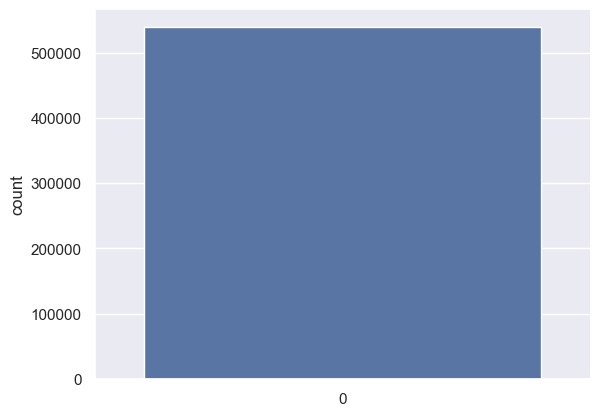

In [16]:
sns.countplot(df['Class'])
df['Class'].value_counts()

In [17]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = df[(df['Class']==0)] 
df_minority = df[(df['Class']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 299118, # to match majority class
                                 random_state=0)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

1    299118
0    299118
Name: Class, dtype: int64

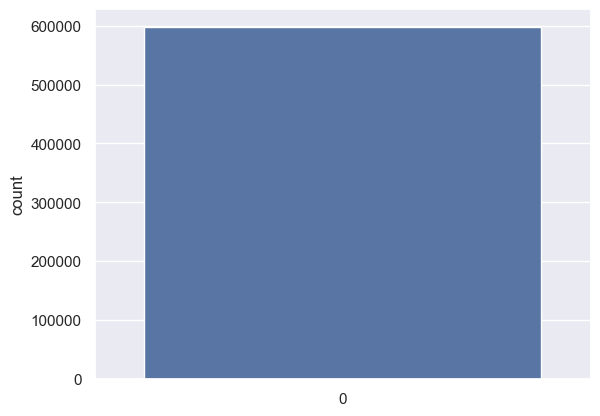

In [18]:
sns.countplot(df_upsampled['Class'])
df_upsampled['Class'].value_counts()

In [19]:
#Remove Outlier using Z-Score Method
import scipy.stats as stats
z = np.abs(stats.zscore(df_upsampled))
data_clean = df_upsampled[(z<3).all(axis = 1)] 
data_clean.shape

(587262, 7)

<Axes: >

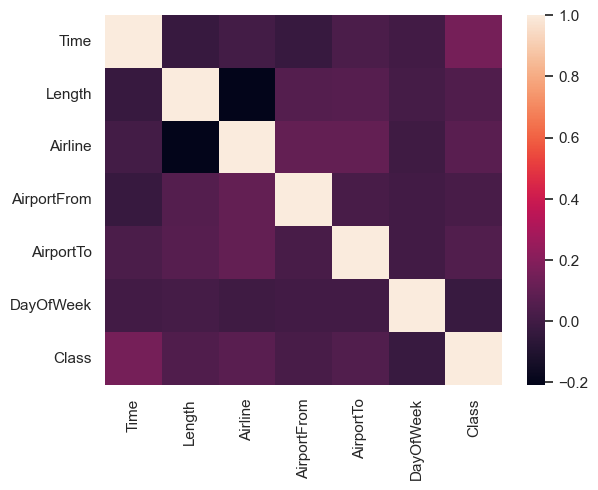

In [20]:
sns.heatmap(data_clean.corr(), fmt='.2g')

In [21]:
X = data_clean.drop('Class', axis=1)
y = data_clean['Class']

In [22]:
#test size 20% and train size 80%
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

In [23]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [24]:
y_pred = dtree.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 68.09 %


In [25]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

F-1 Score :  0.6744489030173536
Precision Score :  0.686760413902892
Recall Score :  0.6625710336353863


In [26]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [27]:
y_pred = rfc.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 69.89 %


In [28]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

F-1 Score :  0.7072126886366834
Precision Score :  0.6867303302144625
Recall Score :  0.7289544190173893


In [29]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [30]:
y_pred = lr.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 57.52 %


In [31]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

F-1 Score :  0.572576568858428
Precision Score :  0.5749062381722465
Recall Score :  0.5702657041929043


In [32]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state=0)
ada.fit(X_train, y_train)

AdaBoostClassifier(random_state=0)

In [33]:
y_pred = ada.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 62.38 %


In [34]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

F-1 Score :  0.6156910151935504
Precision Score :  0.6277844778660613
Recall Score :  0.6040546767009676


Text(0.5, 1.0, 'Accuracy Score: 69.8866780754855')

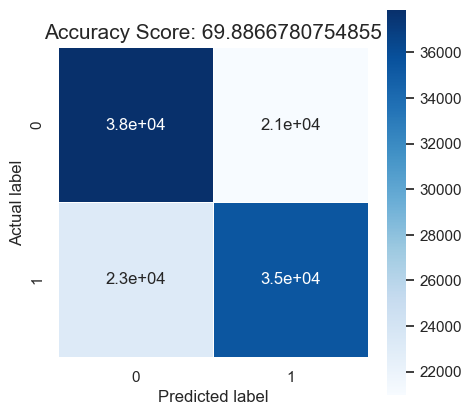

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(rfc.score(X_test, y_test)*100)
plt.title(all_sample_title, size = 15)

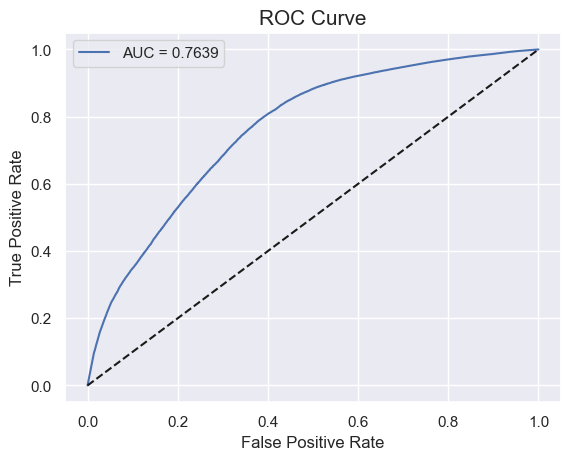

In [36]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]
df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

In [37]:
#Feature Importance
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": rfc.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)
fi

,Feature Name,Importance
0,Time,0.264537
5,DayOfWeek,0.239242
1,Length,0.177447
3,AirportFrom,0.110214
2,Airline,0.108437
4,AirportTo,0.100123


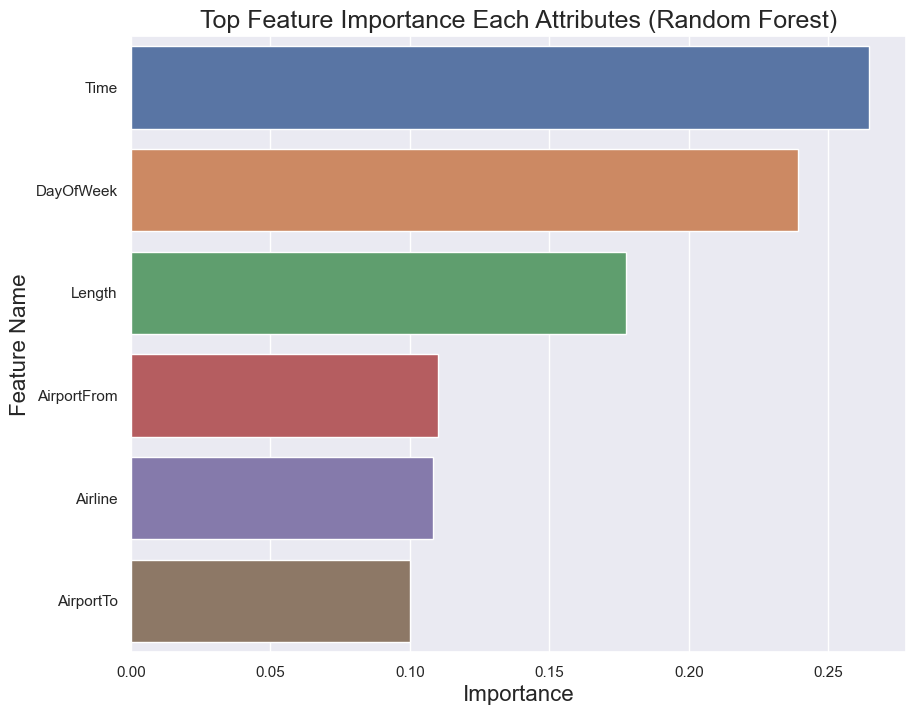

In [38]:
fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top Feature Importance Each Attributes (Random Forest)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()